In [115]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [116]:
df = pd.read_csv('data/raw/train_FD001.txt', sep=" ", header=None)

In [117]:
columns = [
    # Index Names
    "engine",   # Engine No.
    "cycle",    # Time, In Cycles

    # Setting Names
    "setting1",  # Operation Setting 1
    "setting2",  # Operation Setting 2
    "setting3",  # Operation Setting 3

    # Sensor Names (full names)
    "Fan Inlet Temperature (°K)",
    "LPC Outlet Temperature (°K)",
    "HPC Outlet Temperature (°K)",
    "LPT Outlet Temperature (°K)",
    "Fan Inlet Pressure (kPa)",
    "Bypass-Duct Pressure (kPa)",
    "HPC Outlet Pressure (kPa)",
    "Physical Fan Speed (rpm)",
    "Physical Core Speed (rpm)",
    "Engine Pressure Ratio (P50/P2)",
    "HPC Outlet Static Pressure (kPa)",
    "Ratio of Fuel Flow to Ps30 (m²/s)",
    "Corrected Fan Speed (rpm)",
    "Corrected Core Speed (rpm)",
    "Bypass Ratio",
    "Burner Fuel-Air Ratio",
    "Bleed Enthalpy",
    "Required Fan Speed",
    "Required Fan Conversion Speed",
    "High-Pressure Turbines Cool Air Flow",
    "Low-Pressure Turbines Cool Air Flow"
]


In [118]:
## Changing to SI units
df.iloc[:, 5] = df.iloc[:, 5] * (5/9)   # Fan Inlet Temperature Rankine to Kelvin
df.iloc[:, 6] = df.iloc[:, 6] * (5/9)   # LPC Outlet Temp Rankine to Kelvin
df.iloc[:, 7] = df.iloc[:, 7] * (5/9)   # HPC Outlet Temp Rankine to Kelvin
df.iloc[:, 8] = df.iloc[:, 8] * (5/9)   # LPT Outlet Temp Rankine to Kelvin
df.iloc[:, 9] = df.iloc[:, 9] * 6.89476     # Fan Inlet Pressure psia to kPa
df.iloc[:, 10] = df.iloc[:, 10] * 6.89476     # Bypass-Duct Pressure psia to kPa
df.iloc[:, 11] = df.iloc[:, 11] * 6.89476     # HPC Outlet Pressure psia to kPa
df.iloc[:, 15] = df.iloc[:, 15] * 6.89476     # HPC Outlet Static Pressure psia to kPa
df.iloc[:, 16] = df.iloc[:, 16] * 0.00064516  # Mass flow rate to LPC outlet converted from pps/psia to m²/s


In [119]:
# df.head()

In [120]:
# drop the last two columns which are empty
df = df.drop(columns=[26, 27])
df.columns = columns

In [121]:
# df.head()

In [122]:
# df.columns = columns

In [123]:
df.head()

,engine,cycle,setting1,setting2,setting3,Fan Inlet Temperature (°K),LPC Outlet Temperature (°K),HPC Outlet Temperature (°K),LPT Outlet Temperature (°K),Fan Inlet Pressure (kPa),...,Ratio of Fuel Flow to Ps30 (m²/s),Corrected Fan Speed (rpm),Corrected Core Speed (rpm),Bypass Ratio,Burner Fuel-Air Ratio,Bleed Enthalpy,Required Fan Speed,Required Fan Conversion Speed,High-Pressure Turbines Cool Air Flow,Low-Pressure Turbines Cool Air Flow
0,1,1,-0.0007,-0.0004,100.0,288.15,356.566667,883.166667,778.111111,100.801391,...,0.336554,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,288.15,356.750000,884.344444,779.522222,100.801391,...,0.336954,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,288.15,356.861111,882.216667,780.111111,100.801391,...,0.337044,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,288.15,356.861111,879.327778,778.816667,100.801391,...,0.337328,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,288.15,356.872222,879.361111,781.233333,100.801391,...,0.336896,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


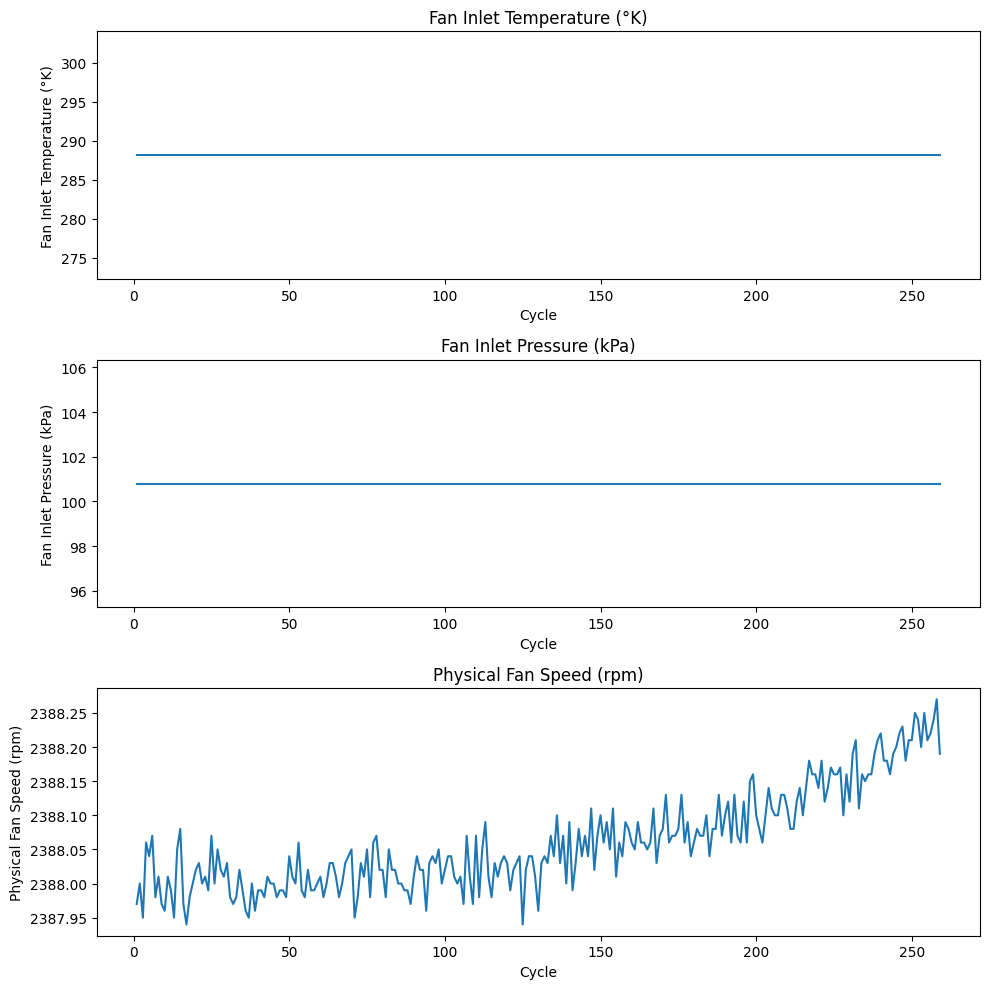

In [124]:
# plot all cycles for engine 1 for sensor "Fan Inlet Temperature (°R)", "Fan Inlet Pressure (psia)", "Physical Fan Speed (rpm)" in 3 subplots
engine_1 = df[df['engine'] == 7]

fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[0].plot(engine_1['cycle'], engine_1['Fan Inlet Temperature (°K)'])
axs[0].set_title('Fan Inlet Temperature (°K)')
axs[0].set_xlabel('Cycle')
axs[0].set_ylabel('Fan Inlet Temperature (°K)')
axs[1].plot(engine_1['cycle'], engine_1['Fan Inlet Pressure (kPa)'])
axs[1].set_title('Fan Inlet Pressure (kPa)')
axs[1].set_xlabel('Cycle')
axs[1].set_ylabel('Fan Inlet Pressure (kPa)')
axs[2].plot(engine_1['cycle'], engine_1['Physical Fan Speed (rpm)'])
axs[2].set_title('Physical Fan Speed (rpm)')
axs[2].set_xlabel('Cycle')
axs[2].set_ylabel('Physical Fan Speed (rpm)')
plt.tight_layout()
plt.show()

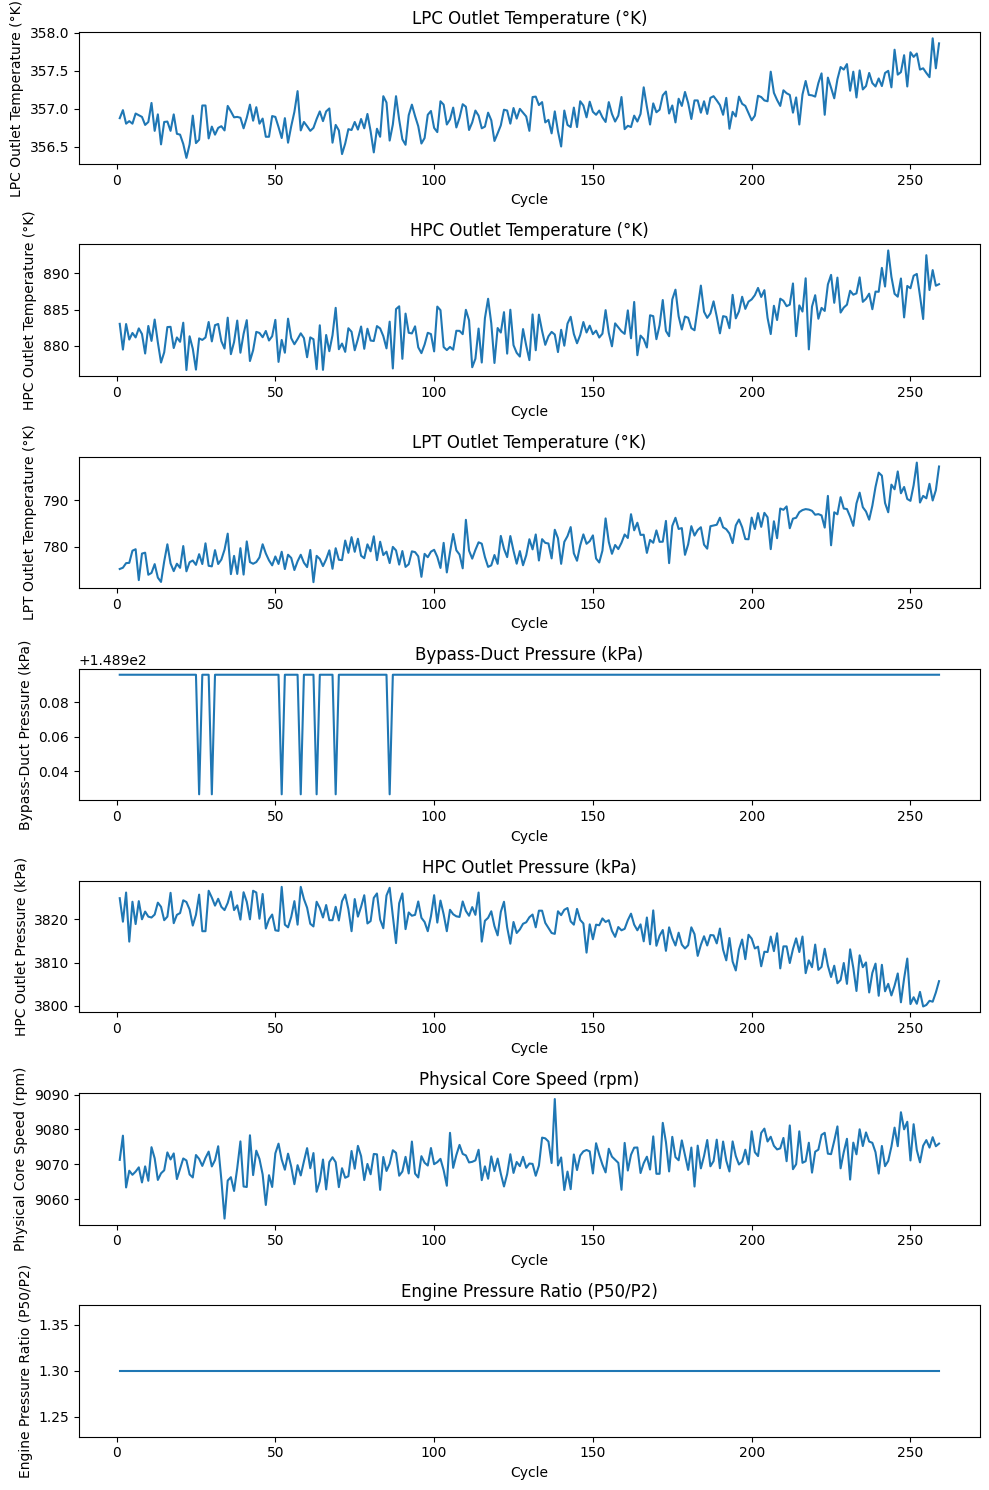

In [137]:
## Second lot of plotting to determine relationships
f, ax = plt.subplots(7,1, figsize = (10,15))
ax[0].plot(engine_1['cycle'], engine_1['LPC Outlet Temperature (°K)'])
ax[0].set_title('LPC Outlet Temperature (°K)')
ax[0].set_xlabel('Cycle')
ax[0].set_ylabel('LPC Outlet Temperature (°K)')

ax[1].plot(engine_1['cycle'], engine_1['HPC Outlet Temperature (°K)'])
ax[1].set_title('HPC Outlet Temperature (°K)')
ax[1].set_xlabel('Cycle')
ax[1].set_ylabel('HPC Outlet Temperature (°K)')

ax[2].plot(engine_1['cycle'], engine_1['LPT Outlet Temperature (°K)'])
ax[2].set_title('LPT Outlet Temperature (°K)')
ax[2].set_xlabel('Cycle')
ax[2].set_ylabel('LPT Outlet Temperature (°K)')

ax[3].plot(engine_1['cycle'], engine_1['Bypass-Duct Pressure (kPa)'])
ax[3].set_title('Bypass-Duct Pressure (kPa)')
ax[3].set_xlabel('Cycle')
ax[3].set_ylabel('Bypass-Duct Pressure (kPa)')

ax[4].plot(engine_1['cycle'], engine_1['HPC Outlet Pressure (kPa)'])
ax[4].set_title('HPC Outlet Pressure (kPa)')
ax[4].set_xlabel('Cycle')
ax[4].set_ylabel('HPC Outlet Pressure (kPa)')

ax[5].plot(engine_1['cycle'], engine_1['Physical Core Speed (rpm)'])
ax[5].set_title('Physical Core Speed (rpm)')
ax[5].set_xlabel('Cycle')
ax[5].set_ylabel('Physical Core Speed (rpm)')

ax[6].plot(engine_1['cycle'], engine_1['Engine Pressure Ratio (P50/P2)'])
ax[6].set_title('Engine Pressure Ratio (P50/P2)')
ax[6].set_xlabel('Cycle')
ax[6].set_ylabel('Engine Pressure Ratio (P50/P2)')

plt.tight_layout()
plt.show()
